## Import dependencies

Code dependencies

In [165]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown


Data files ...  first the trip data

In [166]:
# Load the trip data file
df = pd.read_csv(Path("data/all-trips-geo.csv").resolve())

df.sample(5)

,plate,Start Hub,End Hub,Date,Start Time,Trip Durration,Billing Zip Code,Start Hub Geolocation,End Hub Geolocation
851,9140040,Cronton Ave & Pleasantville Road,Cronton Ave & Pleasantville Road,2024-09-20,2024-09-20 16:46:36,2:05:55,10562.0,"(41.1669377, -73.8497735)","(41.1669377, -73.8497735)"
99,9140029,Metro North - Plaza,Nelson park,2024-11-25,2024-11-25 21:38:09,0:06:32,10562.0,"(41.157844, -73.868112)","(41.1521048, -73.8623897)"
873,9140049,Spring & Waller,C Town Markets,2024-09-20,2024-09-20 22:13:42,0:05:11,10562.0,"(41.1593892, -73.8638232)","(41.1653387, -73.856297)"
68,9140026,Municipal Parking Lot Lot# 7,Metro North - Plaza,2024-11-30,2024-11-30 7:28:23,0:05:52,11433.0,"(41.1618223, -73.8629757)","(41.157844, -73.868112)"
355,9140014,C Town Markets,Nelson park,2024-10-24,2024-10-24 20:38:55,0:16:22,10570.0,"(41.1653387, -73.856297)","(41.1521048, -73.8623897)"


Now the hub locations

In [167]:
addresses_df = pd.read_csv(Path("data/hub-locations.csv").resolve())
addresses_df = addresses_df.drop(columns=["OpenStreetMap Data"]) # drop the column with OSM data... we don't need it here.

addresses_df.sample(5)

,Hub,Address,Geolocation
0,Arcadian Shopping Center,"225-207 Albany Post Rd, Briarcliff Manor, NY 1...","(41.1394616, -73.861803)"
10,Wishnie Park,"145-149 Orchard Rd, Briarcliff Manor, NY 10510","(41.1607067, -73.8477673)"
2,Cronton Ave & Pleasantville Road,"Croton Ave & Pleasantville Rd, Ossining, NY 10562","(41.1669377, -73.8497735)"
9,"Spring St, Cofield","Spring St & Broad Ave, Ossining, NY 10562","(41.1570899, -73.8640002)"
5,Municipal Parking Lot Lot# 7,"1-15 Leonard St, Ossining, NY 10562","(41.1618223, -73.8629757)"


## Mark trips with same start and end hub
So we can analyze them further later.

In [168]:
# Add 'Single Hub' column
df['Single Hub'] = df['Start Hub'] == df['End Hub']

df.sample(5)

,plate,Start Hub,End Hub,Date,Start Time,Trip Durration,Billing Zip Code,Start Hub Geolocation,End Hub Geolocation,Single Hub
755,9140049,Nelson park,Nelson park,2024-09-19,2024-09-19 18:35:26,0:53:50,10562.0,"(41.1521048, -73.8623897)","(41.1521048, -73.8623897)",True
446,9140026,Cronton Ave & Pleasantville Road,Ossining Public Library,2024-10-30,2024-10-30 17:49:10,0:07:01,10562.0,"(41.1669377, -73.8497735)","(41.1642872, -73.8604165)",False
465,9140008,Market Square,Arcadian Shopping Center,2024-10-05,2024-10-05 18:19:02,0:21:31,10566.0,"(41.1609922, -73.8627212)","(41.1394616, -73.861803)",False
612,9140027,Market Square,Nelson park,2024-10-01,2024-10-01 14:09:40,0:08:31,10562.0,"(41.1609922, -73.8627212)","(41.1521048, -73.8623897)",False
455,9140020,Cronton Ave & Pleasantville Road,Market Square,2024-10-25,2024-10-25 18:47:52,0:24:06,10562.0,"(41.1669377, -73.8497735)","(41.1609922, -73.8627212)",False


## Weekday vs. Weekend
Compare and contrast

In [169]:
# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Add 'Weekend' column
df['Weekend'] = df['Date'].dt.dayofweek.isin([5, 6])  # 5 = Saturday, 6 = Sunday

df.sample(5)

,plate,Start Hub,End Hub,Date,Start Time,Trip Durration,Billing Zip Code,Start Hub Geolocation,End Hub Geolocation,Single Hub,Weekend
4,9140036,Nelson park,Metro North - Plaza,2024-12-09,2024-12-09 9:46:02,0:04:49,10562.0,"(41.1521048, -73.8623897)","(41.157844, -73.868112)",False,False
90,9140013,Ossining Public Library,Market Square,2024-11-04,2024-11-04 8:58:09,2:49:26,10562.0,"(41.1642872, -73.8604165)","(41.1609922, -73.8627212)",False,False
1260,9140002,Wishnie Park,Wishnie Park,2024-08-28,2024-08-28 11:21:08,0:31:04,10510.0,"(41.1607067, -73.8477673)","(41.1607067, -73.8477673)",True,False
1342,9140016,Metro North - Plaza,Metro North - Plaza,2024-08-31,2024-08-31 15:19:51,0:00:44,11433.0,"(41.157844, -73.868112)","(41.157844, -73.868112)",True,True
440,9140010,Metro North - Plaza,Municipal Parking Lot Lot# 7,2024-10-27,2024-10-27 13:36:05,0:22:42,10562.0,"(41.157844, -73.868112)","(41.1618223, -73.8629757)",False,True


Convert duration to seconds for easier analysis later

In [170]:
# Convert 'Trip Durration' to seconds
df['Trip Duration Seconds'] = round(pd.to_timedelta(df['Trip Durration']).dt.total_seconds())

# Remove outliers
# Calculate the interquartile range (IQR) for each 'Start Hub', 'End Hub' combination
def remove_outliers(group):
    q1 = group['Trip Duration Seconds'].quantile(0.25)
    q3 = group['Trip Duration Seconds'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return group[(group['Trip Duration Seconds'] >= lower_bound) & (group['Trip Duration Seconds'] <= upper_bound)]

# Apply the function to remove outliers
df = df.groupby(['Start Hub', 'End Hub'], group_keys=False).apply(remove_outliers)

df


/var/folders/rl/zsmq7_5n7qb5hfn1x6h1j_wc0000gq/T/ipykernel_410/1131295083.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['Start Hub', 'End Hub'], group_keys=False).apply(remove_outliers)


,plate,Start Hub,End Hub,Date,Start Time,Trip Durration,Billing Zip Code,Start Hub Geolocation,End Hub Geolocation,Single Hub,Weekend,Trip Duration Seconds
13,9140034,Arcadian Shopping Center,Arcadian Shopping Center,2024-12-07,2024-12-07 21:30:43,0:22:35,10562.0,"(41.1394616, -73.861803)","(41.1394616, -73.861803)",True,True,1355.0
20,9140050,Arcadian Shopping Center,Arcadian Shopping Center,2024-12-07,2024-12-07 21:30:36,0:21:07,10514.0,"(41.1394616, -73.861803)","(41.1394616, -73.861803)",True,True,1267.0
205,9140023,Arcadian Shopping Center,Arcadian Shopping Center,2024-11-18,2024-11-18 14:21:49,0:08:22,10562.0,"(41.1394616, -73.861803)","(41.1394616, -73.861803)",True,False,502.0
657,9140023,Arcadian Shopping Center,Arcadian Shopping Center,2024-10-21,2024-10-21 21:02:03,0:10:27,10591.0,"(41.1394616, -73.861803)","(41.1394616, -73.861803)",True,False,627.0
658,9140041,Arcadian Shopping Center,Arcadian Shopping Center,2024-10-21,2024-10-21 20:53:16,0:17:26,10591.0,"(41.1394616, -73.861803)","(41.1394616, -73.861803)",True,False,1046.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1259,9140003,Wishnie Park,Wishnie Park,2024-08-28,2024-08-28 21:39:24,0:27:26,10562.0,"(41.1607067, -73.8477673)","(41.1607067, -73.8477673)",True,False,1646.0
1260,9140002,Wishnie Park,Wishnie Park,2024-08-28,2024-08-28 11:21:08,0:31:04,10510.0,"(41.1607067, -73.8477673)","(41.1607067, -73.8477673)",True,False,1864.0
1308,9140012,Wishnie Park,Wishnie Park,2024-08-28,2024-08-28 11:20:56,0:28:35,12010.0,"(41.1607067, -73.8477673)","(41.1607067, -73.8477673)",True,False,1715.0
1346,9140012,Wishnie Park,Wishnie Park,2024-08-27,2024-08-27 17:10:44,0:15:00,12010.0,"(41.1607067, -73.8477673)","(41.1607067, -73.8477673)",True,False,900.0


## Mark for time of day
Mark each trip as either "Morning", "Afternoon", "Evening", or "Night" based on the start time of the trip.

In [171]:
# Define a function to categorize time of day
def categorize_time_of_day(start_time):
    hour = pd.to_datetime(start_time).hour
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

# Apply the function to create the 'Time Of Day' column
df['Time Of Day'] = df['Start Time'].apply(categorize_time_of_day)

df.sample(5)

,plate,Start Hub,End Hub,Date,Start Time,Trip Durration,Billing Zip Code,Start Hub Geolocation,End Hub Geolocation,Single Hub,Weekend,Trip Duration Seconds,Time Of Day
867,9140042,Municipal Parking Lot Lot# 7,Cronton Ave & Pleasantville Road,2024-10-09,2024-10-09 12:45:11,0:10:32,10566.0,"(41.1618223, -73.8629757)","(41.1669377, -73.8497735)",False,False,632.0,Afternoon
343,9140026,Municipal Parking Lot Lot# 7,Arcadian Shopping Center,2024-11-13,2024-11-13 16:49:46,0:10:01,10562.0,"(41.1618223, -73.8629757)","(41.1394616, -73.861803)",False,False,601.0,Afternoon
191,9140013,Nelson park,Metro North - Plaza,2024-11-11,2024-11-11 9:21:40,0:05:45,10562.0,"(41.1521048, -73.8623897)","(41.157844, -73.868112)",False,False,345.0,Morning
656,9140040,C Town Markets,C Town Markets,2024-10-15,2024-10-15 10:47:06,2:35:57,10562.0,"(41.1653387, -73.856297)","(41.1653387, -73.856297)",True,False,9357.0,Morning
1265,9140019,Metro North - Plaza,Wishnie Park,2024-09-03,2024-09-03 19:01:03,0:13:29,10562.0,"(41.157844, -73.868112)","(41.1607067, -73.8477673)",False,False,809.0,Evening


Compare number of trips on weekdays vs. weekends

In [172]:
df_weekday = df[df['Weekend'] == False] # weekdays only
df_weekend = df[df['Weekend'] == True] # weekends only


## Start breaking down stats by hub

Get ordered list of trips for both sets

In [173]:
# Create a new DataFrame with 'Hub' from addresses_df
hub_counts_df = addresses_df[['Hub']].copy()

# Calculate 'Weekday Start Count'
hub_counts_df['Weekday Start Count'] = hub_counts_df['Hub'].apply(
    lambda hub: df[(df['Start Hub'] == hub) & (df['Weekend'] == False)].shape[0]
)

# Calculate 'Weekend Start Count'
hub_counts_df['Weekend Start Count'] = hub_counts_df['Hub'].apply(
    lambda hub: df[(df['Start Hub'] == hub) & (df['Weekend'] == True)].shape[0]
)

# Calculate 'Weekday End Count'
hub_counts_df['Weekday End Count'] = hub_counts_df['Hub'].apply(
    lambda hub: df[(df['End Hub'] == hub) & (df['Weekend'] == False)].shape[0]
)

# Calculate 'Weekend End Count'
hub_counts_df['Weekend End Count'] = hub_counts_df['Hub'].apply(
    lambda hub: df[(df['End Hub'] == hub) & (df['Weekend'] == True)].shape[0]
)

# Calculate 'Weekday Single Hub Count'
hub_counts_df['Weekday Single Hub Count'] = hub_counts_df['Hub'].apply(
    lambda hub: df[(df['Single Hub'] == True) & (df['Start Hub'] == hub) & (df['Weekend'] == False)].shape[0]
)

# Calculate 'Weekend Single Hub Count'
hub_counts_df['Weekend Single Hub Count'] = hub_counts_df['Hub'].apply(
    lambda hub: df[(df['Single Hub'] == True) & (df['Start Hub'] == hub) & (df['Weekend'] == True)].shape[0]
)


# Calculate 'Weekday Total Count'
hub_counts_df['Weekday Total Count'] = hub_counts_df['Weekday Start Count'] + hub_counts_df['Weekday End Count']

# Calculate 'Weekend Total Count'
hub_counts_df['Weekend Total Count'] = hub_counts_df['Weekend Start Count'] + hub_counts_df['Weekend End Count']

# Sort by difference between weekday and weekend total counts
hub_counts_df['Total Difference'] = hub_counts_df['Weekday Total Count'] - hub_counts_df['Weekend Total Count']

# Sort the DataFrame by 'Total Difference' in descending order
hub_counts_df = hub_counts_df.sort_values(by='Total Difference', ascending=False)

hub_counts_df

,Hub,Weekday Start Count,Weekend Start Count,Weekday End Count,Weekend End Count,Weekday Single Hub Count,Weekend Single Hub Count,Weekday Total Count,Weekend Total Count,Total Difference
0,Arcadian Shopping Center,95,49,149,53,18,18,244,102,142
5,Municipal Parking Lot Lot# 7,126,34,83,33,36,11,209,67,142
6,Nelson park,138,87,145,74,76,60,283,161,122
1,C Town Markets,75,19,60,26,37,9,135,45,90
2,Cronton Ave & Pleasantville Road,64,21,73,34,26,16,137,55,82
3,Market Square,54,20,56,13,27,7,110,33,77
4,Metro North - Plaza,108,74,100,74,30,41,208,148,60
9,"Spring St, Cofield",55,24,47,22,34,16,102,46,56
8,Spring & Waller,46,19,39,20,15,10,85,39,46
7,Ossining Public Library,46,37,53,29,23,19,99,66,33


### Count trips, not hub interactions
Adjust counts so that single hub counts are counted only once and not included in start or end counts for the relevant hub.
Note this is different from how Drop Mobility has analyzed the data.

In [174]:
# adjust so single hub counts are not double-counted, since we're counting "trips" not "hub interactions".
hub_counts_df['Weekday Single Hub Count'] = hub_counts_df['Weekday Single Hub Count'].apply(lambda x: round(x / 2))
hub_counts_df['Weekend Single Hub Count'] = hub_counts_df['Weekend Single Hub Count'].apply(lambda x: round(x / 2))
hub_counts_df['Weekday Start Count'] = hub_counts_df['Weekday Start Count'] - hub_counts_df['Weekday Single Hub Count']
hub_counts_df['Weekend Start Count'] = hub_counts_df['Weekend Start Count'] - hub_counts_df['Weekend Single Hub Count']
hub_counts_df['Weekday End Count'] = hub_counts_df['Weekday End Count'] - hub_counts_df['Weekday Single Hub Count']
hub_counts_df['Weekend End Count'] = hub_counts_df['Weekend End Count'] - hub_counts_df['Weekend Single Hub Count']
hub_counts_df['Weekday Total Count'] = hub_counts_df['Weekday Start Count'] + hub_counts_df['Weekday End Count'] + hub_counts_df['Weekday Single Hub Count']
hub_counts_df['Weekend Total Count'] = hub_counts_df['Weekend Start Count'] + hub_counts_df['Weekend End Count'] + hub_counts_df['Weekend Single Hub Count']
hub_counts_df['Total Count'] = hub_counts_df['Weekday Total Count'] + hub_counts_df['Weekend Total Count'] # add this sum

hub_counts_df


,Hub,Weekday Start Count,Weekend Start Count,Weekday End Count,Weekend End Count,Weekday Single Hub Count,Weekend Single Hub Count,Weekday Total Count,Weekend Total Count,Total Difference,Total Count
0,Arcadian Shopping Center,86,40,140,44,9,9,235,93,142,328
5,Municipal Parking Lot Lot# 7,108,28,65,27,18,6,191,61,142,252
6,Nelson park,100,57,107,44,38,30,245,131,122,376
1,C Town Markets,57,15,42,22,18,4,117,41,90,158
2,Cronton Ave & Pleasantville Road,51,13,60,26,13,8,124,47,82,171
3,Market Square,40,16,42,9,14,4,96,29,77,125
4,Metro North - Plaza,93,54,85,54,15,20,193,128,60,321
9,"Spring St, Cofield",38,16,30,14,17,8,85,38,56,123
8,Spring & Waller,38,14,31,15,8,5,77,34,46,111
7,Ossining Public Library,34,27,41,19,12,10,87,56,33,143


### Add time of day counts
Aggregate stats for time of day breakdown later

In [175]:
# Define time of day categories
time_of_day_categories = ['Morning', 'Afternoon', 'Evening', 'Night']

# Add columns for each time of day category for weekdays and weekends
for time_of_day in time_of_day_categories:
    # Weekday counts
    hub_counts_df[f'Weekday {time_of_day} Count'] = hub_counts_df['Hub'].apply(
        lambda hub: df[(df['Start Hub'] == hub) & (df['Weekend'] == False) & (df['Time Of Day'] == time_of_day)].shape[0]
    )
    # Weekend counts
    hub_counts_df[f'Weekend {time_of_day} Count'] = hub_counts_df['Hub'].apply(
        lambda hub: df[(df['Start Hub'] == hub) & (df['Weekend'] == True) & (df['Time Of Day'] == time_of_day)].shape[0]
    )

# Example: Display the updated DataFrame
hub_counts_df.head()

,Hub,Weekday Start Count,Weekend Start Count,Weekday End Count,Weekend End Count,Weekday Single Hub Count,Weekend Single Hub Count,Weekday Total Count,Weekend Total Count,Total Difference,Total Count,Weekday Morning Count,Weekend Morning Count,Weekday Afternoon Count,Weekend Afternoon Count,Weekday Evening Count,Weekend Evening Count,Weekday Night Count,Weekend Night Count
0,Arcadian Shopping Center,86,40,140,44,9,9,235,93,142,328,5,12,31,20,47,12,12,5
5,Municipal Parking Lot Lot# 7,108,28,65,27,18,6,191,61,142,252,4,6,97,18,20,8,5,2
6,Nelson park,100,57,107,44,38,30,245,131,122,376,28,29,39,21,53,33,18,4
1,C Town Markets,57,15,42,22,18,4,117,41,90,158,20,4,18,3,9,3,28,9
2,Cronton Ave & Pleasantville Road,51,13,60,26,13,8,124,47,82,171,19,0,14,7,20,9,11,5


In [176]:
# Add columns for each time of day category broken down by "Start", "End", and "Single Hub"
for time_of_day in time_of_day_categories:
    # Weekday Start counts
    hub_counts_df[f'Weekday {time_of_day} Start Count'] = hub_counts_df['Hub'].apply(
        lambda hub: df_weekday[(df_weekday['Start Hub'] == hub) & (df_weekday['Time Of Day'] == time_of_day)].shape[0]
    )
    # Weekday End counts
    hub_counts_df[f'Weekday {time_of_day} End Count'] = hub_counts_df['Hub'].apply(
        lambda hub: df_weekday[(df_weekday['End Hub'] == hub) & (df_weekday['Time Of Day'] == time_of_day)].shape[0]
    )
    # Weekday Single Hub counts
    hub_counts_df[f'Weekday {time_of_day} Single Hub Count'] = hub_counts_df['Hub'].apply(
        lambda hub: df_weekday[(df_weekday['Single Hub'] == True) & (df_weekday['Start Hub'] == hub) & (df_weekday['Time Of Day'] == time_of_day)].shape[0]
    )
    # Weekend Start counts
    hub_counts_df[f'Weekend {time_of_day} Start Count'] = hub_counts_df['Hub'].apply(
        lambda hub: df_weekend[(df_weekend['Start Hub'] == hub) & (df_weekend['Time Of Day'] == time_of_day)].shape[0]
    )
    # Weekend End counts
    hub_counts_df[f'Weekend {time_of_day} End Count'] = hub_counts_df['Hub'].apply(
        lambda hub: df_weekend[(df_weekend['End Hub'] == hub) & (df_weekend['Time Of Day'] == time_of_day)].shape[0]
    )
    # Weekend Single Hub counts
    hub_counts_df[f'Weekend {time_of_day} Single Hub Count'] = hub_counts_df['Hub'].apply(
        lambda hub: df_weekend[(df_weekend['Single Hub'] == True) & (df_weekend['Start Hub'] == hub) & (df_weekend['Time Of Day'] == time_of_day)].shape[0]
    )

# Display the updated DataFrame
hub_counts_df.head()

,Hub,Weekday Start Count,Weekend Start Count,Weekday End Count,Weekend End Count,Weekday Single Hub Count,Weekend Single Hub Count,Weekday Total Count,Weekend Total Count,Total Difference,...,Weekday Evening Single Hub Count,Weekend Evening Start Count,Weekend Evening End Count,Weekend Evening Single Hub Count,Weekday Night Start Count,Weekday Night End Count,Weekday Night Single Hub Count,Weekend Night Start Count,Weekend Night End Count,Weekend Night Single Hub Count
0,Arcadian Shopping Center,86,40,140,44,9,9,235,93,142,...,1,12,13,7,12,11,4,5,4,2
5,Municipal Parking Lot Lot# 7,108,28,65,27,18,6,191,61,142,...,14,8,15,4,5,6,5,2,3,2
6,Nelson park,100,57,107,44,38,30,245,131,122,...,42,33,31,25,18,27,9,4,7,3
1,C Town Markets,57,15,42,22,18,4,117,41,90,...,5,3,4,0,28,29,21,9,8,6
2,Cronton Ave & Pleasantville Road,51,13,60,26,13,8,124,47,82,...,10,9,12,7,11,14,6,5,7,5


Adjust the new counts again so that we do not double count trips that start and end at the same hub.

In [177]:
# Adjust so single hub counts are not double-counted for the new time of day fields
for time_of_day in time_of_day_categories:
    # Adjust weekday single hub counts
    hub_counts_df[f'Weekday {time_of_day} Single Hub Count'] = hub_counts_df[f'Weekday {time_of_day} Single Hub Count'].apply(lambda x: round(x / 2))
    # Adjust weekend single hub counts
    hub_counts_df[f'Weekend {time_of_day} Single Hub Count'] = hub_counts_df[f'Weekend {time_of_day} Single Hub Count'].apply(lambda x: round(x / 2))
    # Adjust weekday start counts
    hub_counts_df[f'Weekday {time_of_day} Start Count'] = hub_counts_df[f'Weekday {time_of_day} Start Count'] - hub_counts_df[f'Weekday {time_of_day} Single Hub Count']
    # Adjust weekend start counts
    hub_counts_df[f'Weekend {time_of_day} Start Count'] = hub_counts_df[f'Weekend {time_of_day} Start Count'] - hub_counts_df[f'Weekend {time_of_day} Single Hub Count']
    # Adjust weekday end counts
    hub_counts_df[f'Weekday {time_of_day} End Count'] = hub_counts_df[f'Weekday {time_of_day} End Count'] - hub_counts_df[f'Weekday {time_of_day} Single Hub Count']
    # Adjust weekend end counts
    hub_counts_df[f'Weekend {time_of_day} End Count'] = hub_counts_df[f'Weekend {time_of_day} End Count'] - hub_counts_df[f'Weekend {time_of_day} Single Hub Count']
    # Recalculate weekday total counts
    hub_counts_df[f'Weekday {time_of_day} Total Count'] = (
        hub_counts_df[f'Weekday {time_of_day} Start Count'] +
        hub_counts_df[f'Weekday {time_of_day} End Count'] +
        hub_counts_df[f'Weekday {time_of_day} Single Hub Count']
    )
    # Recalculate weekend total counts
    hub_counts_df[f'Weekend {time_of_day} Total Count'] = (
        hub_counts_df[f'Weekend {time_of_day} Start Count'] +
        hub_counts_df[f'Weekend {time_of_day} End Count'] +
        hub_counts_df[f'Weekend {time_of_day} Single Hub Count']
    )

hub_counts_df


,Hub,Weekday Start Count,Weekend Start Count,Weekday End Count,Weekend End Count,Weekday Single Hub Count,Weekend Single Hub Count,Weekday Total Count,Weekend Total Count,Total Difference,...,Weekend Night End Count,Weekend Night Single Hub Count,Weekday Morning Total Count,Weekend Morning Total Count,Weekday Afternoon Total Count,Weekend Afternoon Total Count,Weekday Evening Total Count,Weekend Evening Total Count,Weekday Night Total Count,Weekend Night Total Count
0,Arcadian Shopping Center,86,40,140,44,9,9,235,93,142,...,3,1,12,29,130,35,72,21,21,8
5,Municipal Parking Lot Lot# 7,108,28,65,27,18,6,191,61,142,...,2,1,7,7,113,30,63,21,9,4
6,Nelson park,100,57,107,44,38,30,245,131,122,...,5,2,47,35,61,35,96,52,41,9
1,C Town Markets,57,15,42,22,18,4,117,41,90,...,5,3,26,10,24,10,20,7,47,14
2,Cronton Ave & Pleasantville Road,51,13,60,26,13,8,124,47,82,...,5,2,24,5,44,15,34,17,22,10
3,Market Square,40,16,42,9,14,4,96,29,77,...,3,0,20,5,39,12,29,9,8,4
4,Metro North - Plaza,93,54,85,54,15,20,193,128,60,...,3,1,34,34,72,50,57,31,30,12
9,"Spring St, Cofield",38,16,30,14,17,8,85,38,56,...,7,4,13,9,20,6,28,5,24,18
8,Spring & Waller,38,14,31,15,8,5,77,34,46,...,7,4,15,3,21,10,16,3,25,18
7,Ossining Public Library,34,27,41,19,12,10,87,56,33,...,3,3,6,16,31,22,34,8,18,11


### Munge a bit for trip duration analsysis

Add average trip duration for weekdays and weekends.

In [178]:
# Calculate 'Weekday Avg Duration'
hub_counts_df['Weekday Avg Duration'] = hub_counts_df['Hub'].apply(
    # lambda hub: round(df_weekday[(df_weekday['Start Hub'] == hub) | (df_weekday['End Hub'] == hub)]['Trip Duration Seconds'].mean())
    lambda hub: round(df_weekday[df_weekday['Start Hub'] == hub]['Trip Duration Seconds'].mean()) # only those trips that start at the hub
)

# Calculate 'Weekend Avg Duration'
hub_counts_df['Weekend Avg Duration'] = hub_counts_df['Hub'].apply(
    # lambda hub: round(df_weekend[(df_weekend['Start Hub'] == hub) | (df_weekend['End Hub'] == hub)]['Trip Duration Seconds'].mean())
    lambda hub: round(df_weekend[df_weekend['Start Hub'] == hub]['Trip Duration Seconds'].mean()) # only those trips that start at the hub
)

# Convert 'Weekday Avg Duration' to "hh:mm:ss" format
hub_counts_df['Weekday Avg Duration'] = hub_counts_df['Weekday Avg Duration'].apply(
    lambda x: pd.to_timedelta(x, unit='s').__str__().split()[2] if not pd.isna(x) else None
)

# Convert 'Weekend Avg Duration' to "hh:mm:ss" format
hub_counts_df['Weekend Avg Duration'] = hub_counts_df['Weekend Avg Duration'].apply(
    lambda x: pd.to_timedelta(x, unit='s').__str__().split()[2] if not pd.isna(x) else None
)

hub_counts_df

,Hub,Weekday Start Count,Weekend Start Count,Weekday End Count,Weekend End Count,Weekday Single Hub Count,Weekend Single Hub Count,Weekday Total Count,Weekend Total Count,Total Difference,...,Weekday Morning Total Count,Weekend Morning Total Count,Weekday Afternoon Total Count,Weekend Afternoon Total Count,Weekday Evening Total Count,Weekend Evening Total Count,Weekday Night Total Count,Weekend Night Total Count,Weekday Avg Duration,Weekend Avg Duration
0,Arcadian Shopping Center,86,40,140,44,9,9,235,93,142,...,12,29,130,35,72,21,21,8,00:15:34,00:29:41
5,Municipal Parking Lot Lot# 7,108,28,65,27,18,6,191,61,142,...,7,7,113,30,63,21,9,4,00:28:48,00:42:10
6,Nelson park,100,57,107,44,38,30,245,131,122,...,47,35,61,35,96,52,41,9,00:19:01,00:19:41
1,C Town Markets,57,15,42,22,18,4,117,41,90,...,26,10,24,10,20,7,47,14,00:36:57,00:56:44
2,Cronton Ave & Pleasantville Road,51,13,60,26,13,8,124,47,82,...,24,5,44,15,34,17,22,10,00:38:50,00:36:47
3,Market Square,40,16,42,9,14,4,96,29,77,...,20,5,39,12,29,9,8,4,00:24:16,00:26:57
4,Metro North - Plaza,93,54,85,54,15,20,193,128,60,...,34,34,72,50,57,31,30,12,00:15:45,00:21:15
9,"Spring St, Cofield",38,16,30,14,17,8,85,38,56,...,13,9,20,6,28,5,24,18,00:26:54,00:27:21
8,Spring & Waller,38,14,31,15,8,5,77,34,46,...,15,3,21,10,16,3,25,18,00:27:27,00:26:33
7,Ossining Public Library,34,27,41,19,12,10,87,56,33,...,6,16,31,22,34,8,18,11,00:47:55,00:42:11


## Plots
Visualize the data to spot interesting patterns.

### Weekday vs. weekend

In [179]:
# Sort the DataFrame by 'Total Count' in descending order
hub_counts_df = hub_counts_df.sort_values(by=['Total Count'], ascending=True)


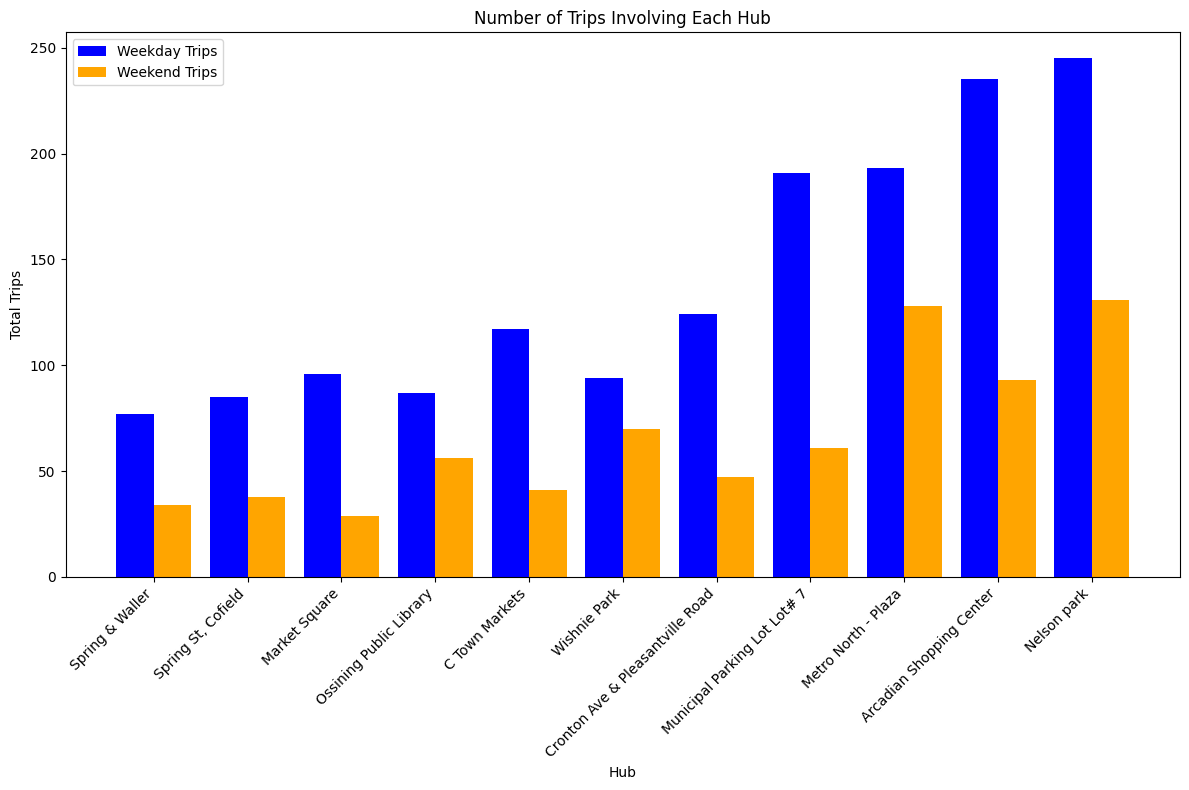

In [180]:

# Set the figure size
plt.figure(figsize=(12, 8))

# Set the bar width
bar_width = 0.4

# Generate positions for the bars
x_positions = np.arange(len(hub_counts_df['Hub']))

# Plot weekday total counts
plt.bar(x_positions - bar_width / 2, hub_counts_df['Weekday Total Count'], width=bar_width, color='blue', label='Weekday Trips')

# Plot weekend total counts
plt.bar(x_positions + bar_width / 2, hub_counts_df['Weekend Total Count'], width=bar_width, color='orange', label='Weekend Trips')

# Add labels and title
plt.xlabel('Hub')
plt.ylabel('Total Trips')
plt.title('Number of Trips Involving Each Hub')
plt.xticks(x_positions, hub_counts_df['Hub'], rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### Weekday vs. weekend, broken down by hub role

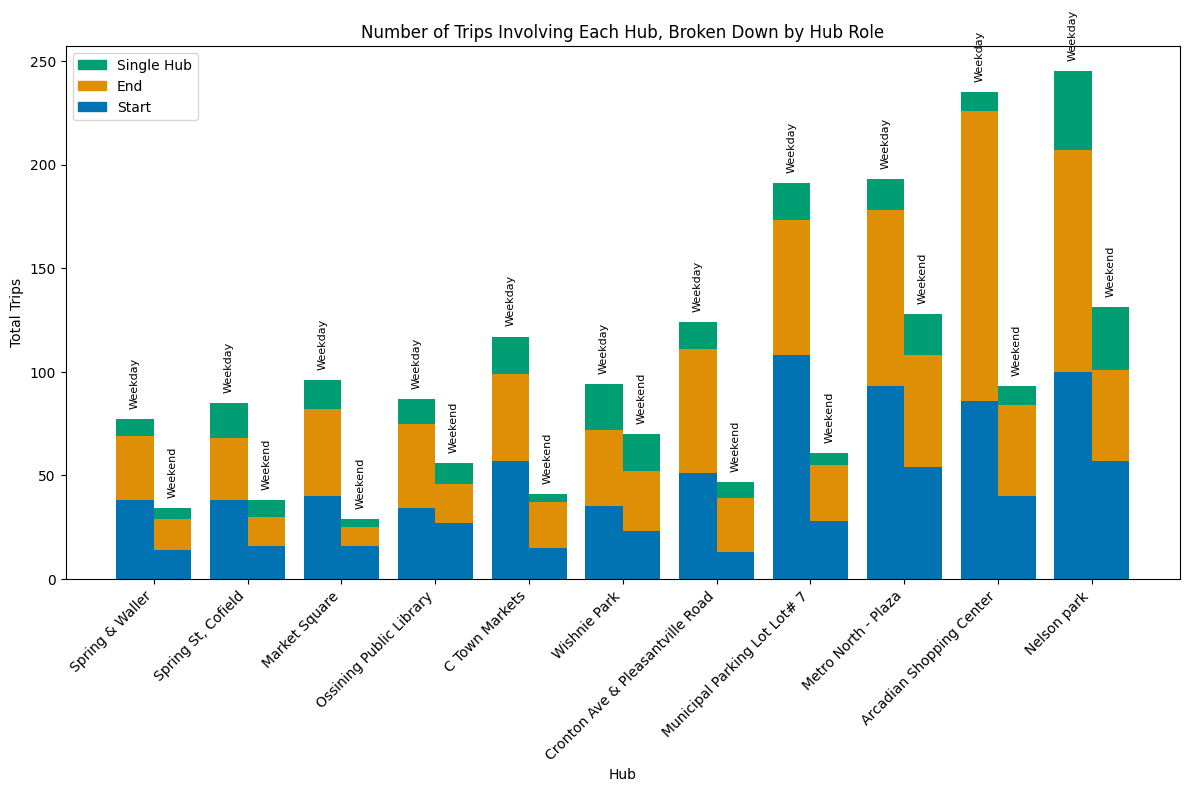

In [181]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Define consistent colors
start_count_color = '#0173b2'  # Blue
end_count_color = '#de8f05'    # Orange
single_hub_color = '#029e73'   # Green

# Generate positions for the bars
x_positions = np.arange(len(hub_counts_df['Hub']))

# Plot stacked bars for weekday counts
plt.bar(x_positions - bar_width / 2, hub_counts_df['Weekday Start Count'], width=bar_width, color=start_count_color, label='Weekday Start Count')
plt.bar(x_positions - bar_width / 2, hub_counts_df['Weekday End Count'], width=bar_width, color=end_count_color, bottom=hub_counts_df['Weekday Start Count'], label='Weekday End Count')
plt.bar(x_positions - bar_width / 2, hub_counts_df['Weekday Single Hub Count'], width=bar_width, color=single_hub_color, bottom=hub_counts_df['Weekday Start Count'] + hub_counts_df['Weekday End Count'], label='Weekday Single Hub Count')

# Plot stacked bars for weekend counts
plt.bar(x_positions + bar_width / 2, hub_counts_df['Weekend Start Count'], width=bar_width, color=start_count_color, label='Weekend Start Count')
plt.bar(x_positions + bar_width / 2, hub_counts_df['Weekend End Count'], width=bar_width, color=end_count_color, bottom=hub_counts_df['Weekend Start Count'], label='Weekend End Count')
plt.bar(x_positions + bar_width / 2, hub_counts_df['Weekend Single Hub Count'], width=bar_width, color=single_hub_color, bottom=hub_counts_df['Weekend Start Count'] + hub_counts_df['Weekend End Count'], label='Weekend Single Hub Count')

# Add labels and title
plt.xlabel('Hub')
plt.ylabel('Total Trips')
plt.title('Number of Trips Involving Each Hub, Broken Down by Hub Role')
plt.xticks(x_positions, hub_counts_df['Hub'], rotation=45, ha='right')
handles = [
        plt.Rectangle((0, 0), 1, 1, color=start_count_color, label='Start'),
        plt.Rectangle((0, 0), 1, 1, color=end_count_color, label='End'),
        plt.Rectangle((0, 0), 1, 1, color=single_hub_color, label='Single Hub')
]
handles.reverse() # looks better
plt.legend(handles=handles)

# Add annotations above each bar
for i, hub in enumerate(hub_counts_df['Hub']):
        # Weekday annotations
        weekday_total = hub_counts_df['Weekday Start Count'].iloc[i] + hub_counts_df['Weekday End Count'].iloc[i] + hub_counts_df['Weekday Single Hub Count'].iloc[i]
        plt.text(x_positions[i] - bar_width / 2, weekday_total + 5, 'Weekday', ha='center', va='bottom', fontsize=8, rotation=90)
        
        # Weekend annotations
        weekend_total = hub_counts_df['Weekend Start Count'].iloc[i] + hub_counts_df['Weekend End Count'].iloc[i] + hub_counts_df['Weekend Single Hub Count'].iloc[i]
        plt.text(x_positions[i] + bar_width / 2, weekend_total + 5, 'Weekend', ha='center', va='bottom', fontsize=8, rotation=90)


# Show the plot
plt.tight_layout()
plt.show()

### Weekday vs weekend trip durations

Plot durations of weekday vs. weekend trips

In [182]:
# Convert 'Weekday Avg Duration' to total seconds for sorting
hub_counts_df['Weekday Avg Duration Seconds'] = pd.to_timedelta(hub_counts_df['Weekday Avg Duration']).dt.total_seconds()

# Sort the DataFrame by 'Weekday Avg Duration Seconds' in ascending order
hub_counts_df = hub_counts_df.sort_values(by='Weekday Avg Duration Seconds', ascending=False)

# Drop the temporary column after sorting
hub_counts_df = hub_counts_df.drop(columns=['Weekday Avg Duration Seconds'])

hub_counts_df

,Hub,Weekday Start Count,Weekend Start Count,Weekday End Count,Weekend End Count,Weekday Single Hub Count,Weekend Single Hub Count,Weekday Total Count,Weekend Total Count,Total Difference,...,Weekday Morning Total Count,Weekend Morning Total Count,Weekday Afternoon Total Count,Weekend Afternoon Total Count,Weekday Evening Total Count,Weekend Evening Total Count,Weekday Night Total Count,Weekend Night Total Count,Weekday Avg Duration,Weekend Avg Duration
7,Ossining Public Library,34,27,41,19,12,10,87,56,33,...,6,16,31,22,34,8,18,11,00:47:55,00:42:11
10,Wishnie Park,35,23,37,29,22,18,94,70,28,...,10,4,26,42,33,16,25,8,00:47:54,00:35:32
2,Cronton Ave & Pleasantville Road,51,13,60,26,13,8,124,47,82,...,24,5,44,15,34,17,22,10,00:38:50,00:36:47
1,C Town Markets,57,15,42,22,18,4,117,41,90,...,26,10,24,10,20,7,47,14,00:36:57,00:56:44
5,Municipal Parking Lot Lot# 7,108,28,65,27,18,6,191,61,142,...,7,7,113,30,63,21,9,4,00:28:48,00:42:10
8,Spring & Waller,38,14,31,15,8,5,77,34,46,...,15,3,21,10,16,3,25,18,00:27:27,00:26:33
9,"Spring St, Cofield",38,16,30,14,17,8,85,38,56,...,13,9,20,6,28,5,24,18,00:26:54,00:27:21
3,Market Square,40,16,42,9,14,4,96,29,77,...,20,5,39,12,29,9,8,4,00:24:16,00:26:57
6,Nelson park,100,57,107,44,38,30,245,131,122,...,47,35,61,35,96,52,41,9,00:19:01,00:19:41
4,Metro North - Plaza,93,54,85,54,15,20,193,128,60,...,34,34,72,50,57,31,30,12,00:15:45,00:21:15


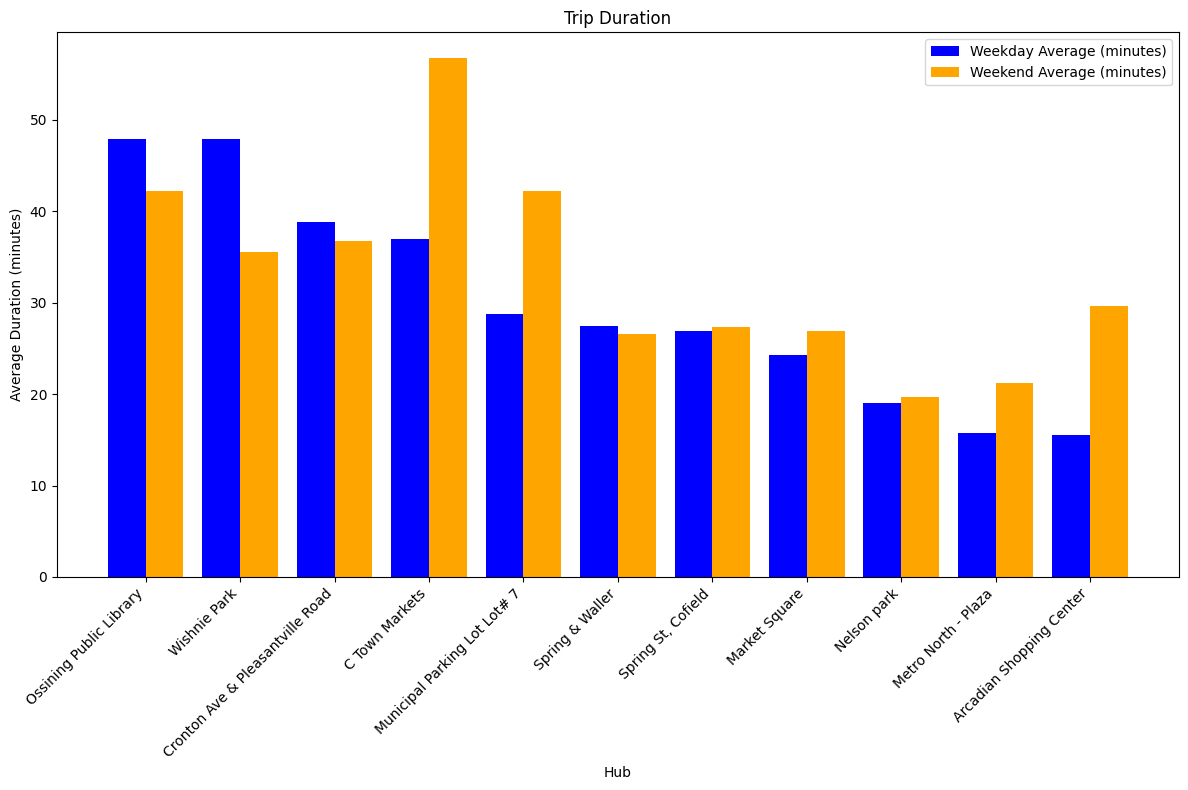

In [183]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Generate positions for the bars
x_positions = np.arange(len(hub_counts_df['Hub']))

# Plot weekday average duration
plt.bar(x_positions - bar_width / 2, pd.to_timedelta(hub_counts_df['Weekday Avg Duration']).dt.total_seconds() / 60, width=bar_width, color='blue', label='Weekday Average (minutes)')

# Plot weekend average duration
plt.bar(x_positions + bar_width / 2, pd.to_timedelta(hub_counts_df['Weekend Avg Duration']).dt.total_seconds() / 60, width=bar_width, color='orange', label='Weekend Average (minutes)')

# Add labels and title
plt.xlabel('Hub')
plt.ylabel('Average Duration (minutes)')
plt.title('Trip Duration')
plt.xticks(x_positions, hub_counts_df['Hub'], rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


## Time of Day Analysis
Differentiate trips by time of day.

Get some non-horrific colors.

In [184]:
import seaborn as sns

# Generate a list of colors with a lot of variation between them
num_colors = len(time_of_day_categories)
colors = sns.color_palette("colorblind", num_colors).as_hex()

colors


['#0173b2', '#de8f05', '#029e73', '#d55e00']

### Weekday vs. weekend, broken down by time of day

Weekend vs. weekdays, broken down by time of day.

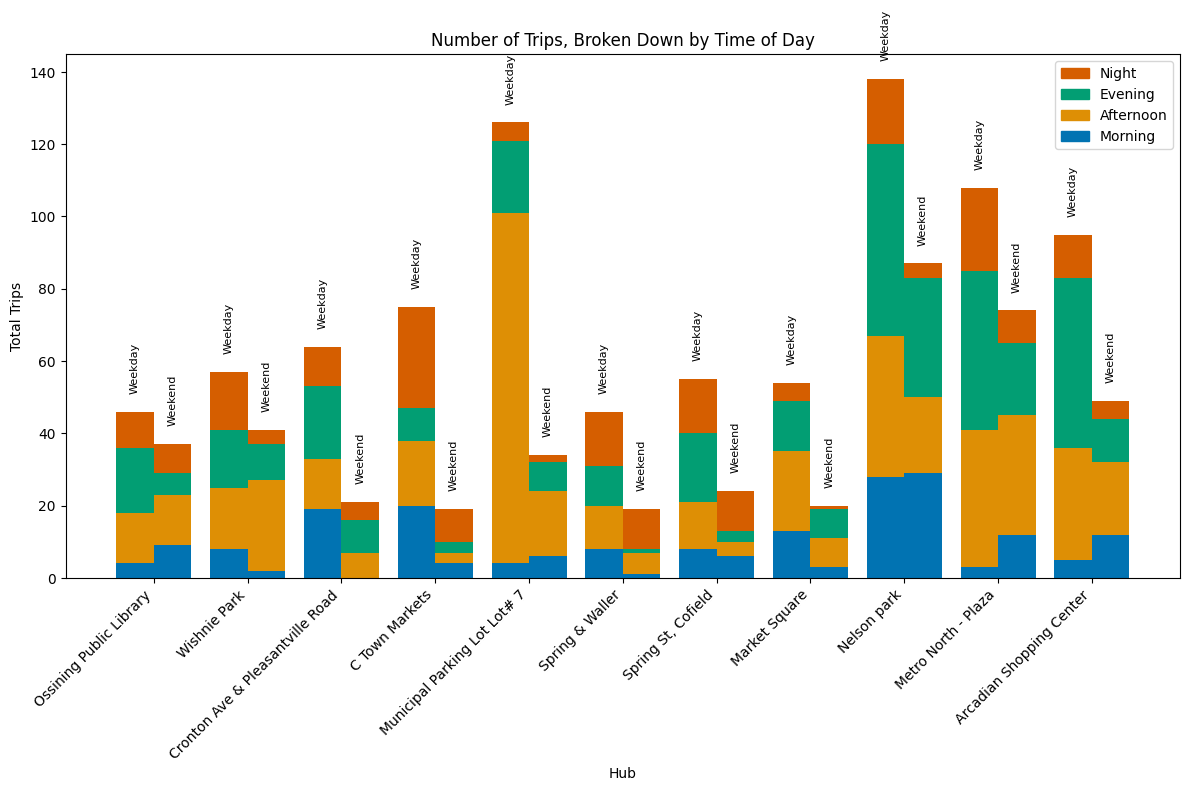

In [185]:

# Define a color mapping for each time of day
time_of_day_colors = dict(zip(time_of_day_categories, colors))

# Set the figure size
plt.figure(figsize=(12, 8))

# Generate positions for the bars
x_positions = np.arange(len(hub_counts_df['Hub']))

# Reverse the order of time_of_day_categories
time_of_day_categories = time_of_day_categories

# Plot stacked bars for weekday counts by time of day
for i, time_of_day in enumerate(time_of_day_categories):
    if i == 0:
        plt.bar(x_positions - bar_width / 2, hub_counts_df[f'Weekday {time_of_day} Count'], width=bar_width, 
                color=time_of_day_colors[time_of_day], label=f'{time_of_day} Count')
        bottom_weekday = hub_counts_df[f'Weekday {time_of_day} Count']
    else:
        plt.bar(x_positions - bar_width / 2, hub_counts_df[f'Weekday {time_of_day} Count'], width=bar_width, 
                bottom=bottom_weekday, color=time_of_day_colors[time_of_day])
        bottom_weekday += hub_counts_df[f'Weekday {time_of_day} Count']

# Plot stacked bars for weekend counts by time of day
for i, time_of_day in enumerate(time_of_day_categories):
    if i == 0:
        plt.bar(x_positions + bar_width / 2, hub_counts_df[f'Weekend {time_of_day} Count'], width=bar_width, 
                color=time_of_day_colors[time_of_day])
        bottom_weekend = hub_counts_df[f'Weekend {time_of_day} Count']
    else:
        plt.bar(x_positions + bar_width / 2, hub_counts_df[f'Weekend {time_of_day} Count'], width=bar_width, 
                bottom=bottom_weekend, color=time_of_day_colors[time_of_day])
        bottom_weekend += hub_counts_df[f'Weekend {time_of_day} Count']

# Add labels and title
plt.xlabel('Hub')
plt.ylabel('Total Trips')
plt.title('Number of Trips, Broken Down by Time of Day')
plt.xticks(x_positions, hub_counts_df['Hub'], rotation=45, ha='right')
# Add legend with counts for each time of day
handles = []
for time_of_day in time_of_day_categories[::-1]:
    # count_weekday = hub_counts_df[f'Weekday {time_of_day} Count'].sum()
    # count_weekend = hub_counts_df[f'Weekend {time_of_day} Count'].sum()
    # handles.append(plt.Rectangle((0, 0), 1, 1, color=time_of_day_colors[time_of_day], 
    #                               label=f'{time_of_day} (Weekday: {count_weekday}, Weekend: {count_weekend})'))
    handles.append(plt.Rectangle((0, 0), 1, 1, color=time_of_day_colors[time_of_day], 
                                  label=f'{time_of_day}'))

plt.legend(handles=handles)

# Add text annotations on top of each bar
for i, hub in enumerate(hub_counts_df['Hub']):
        # Weekday annotation
        plt.text(x_positions[i] - bar_width / 2, bottom_weekday.iloc[i] + 5, 'Weekday', 
                         ha='center', va='bottom', fontsize=8, rotation=90)
        # Weekend annotation
        plt.text(x_positions[i] + bar_width / 2, bottom_weekend.iloc[i] + 5, 'Weekend', 
                         ha='center', va='bottom', fontsize=8, rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

## Trip starts only

Trip starts only, Weekend vs. weekday, broken down by time of day.

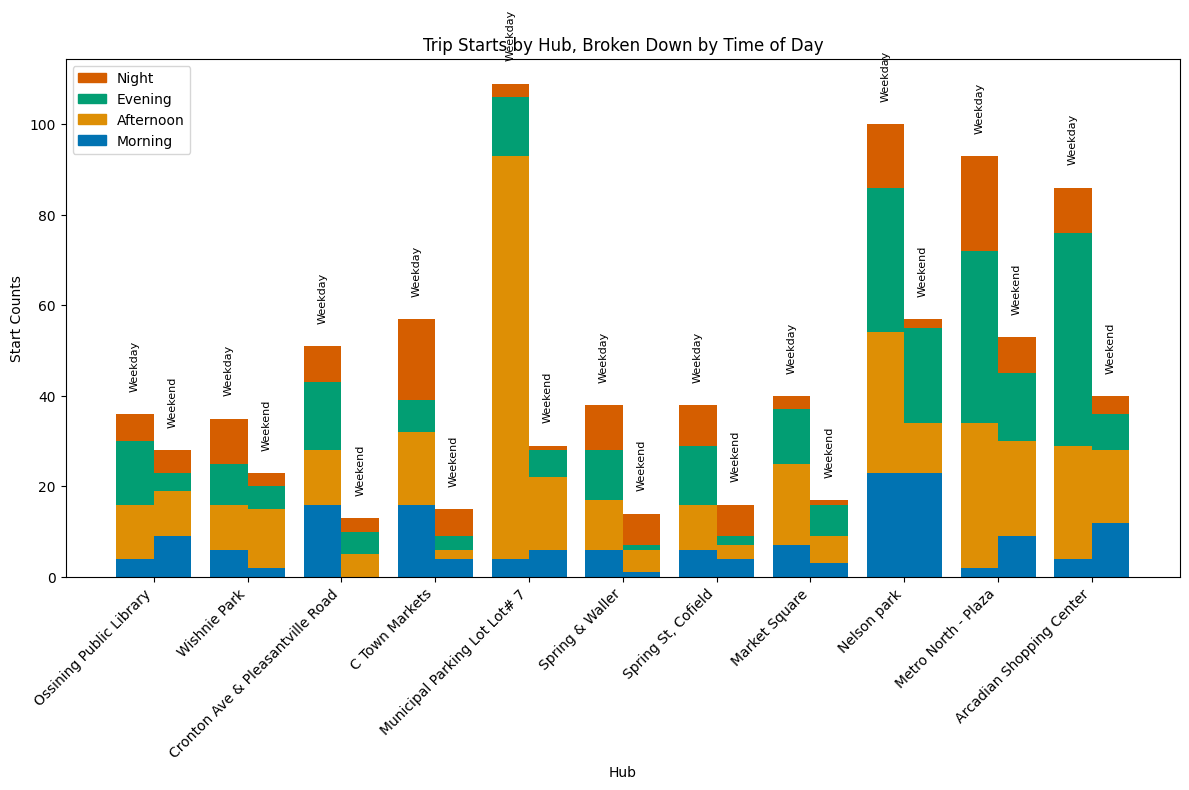

In [186]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Generate positions for the bars
x_positions = np.arange(len(hub_counts_df['Hub']))

# Reverse the order of time_of_day_categories for consistent stacking
# time_of_day_categories = time_of_day_categories[::-1]

# Plot stacked bars for weekday start counts by time of day
for i, time_of_day in enumerate(time_of_day_categories):
    if i == 0:
        plt.bar(x_positions - bar_width / 2, hub_counts_df[f'Weekday {time_of_day} Start Count'], width=bar_width, 
                color=time_of_day_colors[time_of_day], label=f'Weekday {time_of_day}')
        bottom_weekday = hub_counts_df[f'Weekday {time_of_day} Start Count']
    else:
        plt.bar(x_positions - bar_width / 2, hub_counts_df[f'Weekday {time_of_day} Start Count'], width=bar_width, 
                bottom=bottom_weekday, color=time_of_day_colors[time_of_day])
        bottom_weekday += hub_counts_df[f'Weekday {time_of_day} Start Count']

# Plot stacked bars for weekend start counts by time of day
for i, time_of_day in enumerate(time_of_day_categories):
    if i == 0:
        plt.bar(x_positions + bar_width / 2, hub_counts_df[f'Weekend {time_of_day} Start Count'], width=bar_width, 
                color=time_of_day_colors[time_of_day], label=f'Weekend {time_of_day}')
        bottom_weekend = hub_counts_df[f'Weekend {time_of_day} Start Count']
    else:
        plt.bar(x_positions + bar_width / 2, hub_counts_df[f'Weekend {time_of_day} Start Count'], width=bar_width, 
                bottom=bottom_weekend, color=time_of_day_colors[time_of_day])
        bottom_weekend += hub_counts_df[f'Weekend {time_of_day} Start Count']

# Add labels and title
plt.xlabel('Hub')
plt.ylabel('Start Counts')
plt.title('Trip Starts by Hub, Broken Down by Time of Day')
plt.xticks(x_positions, hub_counts_df['Hub'], rotation=45, ha='right')

# Add legend for time of day categories
handles = [plt.Rectangle((0, 0), 1, 1, color=time_of_day_colors[time_of_day], label=time_of_day) for time_of_day in time_of_day_categories[::-1]]
plt.legend(handles=handles)

# Add text annotations on top of each bar
for i, hub in enumerate(hub_counts_df['Hub']):
        # Weekday annotation
        plt.text(x_positions[i] - bar_width / 2, bottom_weekday.iloc[i] + 5, 'Weekday', 
                         ha='center', va='bottom', fontsize=8, rotation=90)
        # Weekend annotation
        plt.text(x_positions[i] + bar_width / 2, bottom_weekend.iloc[i] + 5, 'Weekend', 
                         ha='center', va='bottom', fontsize=8, rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

### Trip ends only

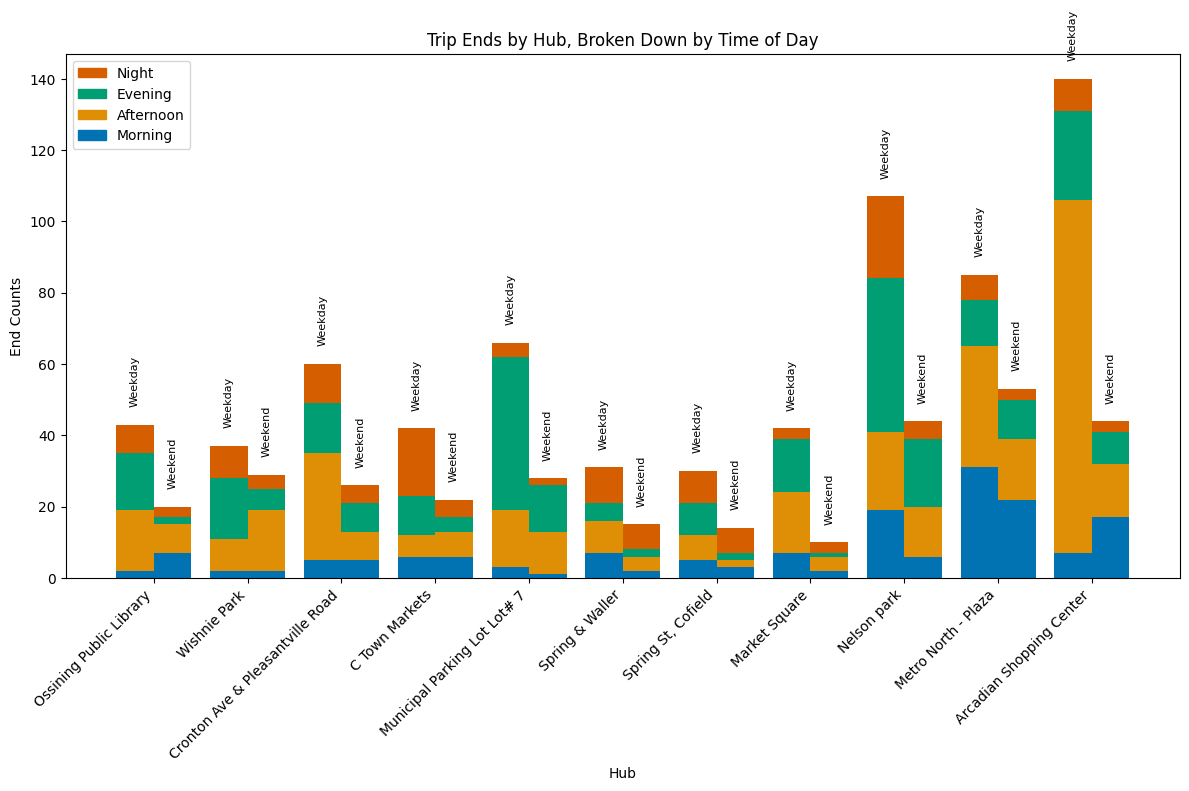

In [187]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Generate positions for the bars
x_positions = np.arange(len(hub_counts_df['Hub']))

# Plot stacked bars for weekday end counts by time of day
for i, time_of_day in enumerate(time_of_day_categories):
    if i == 0:
        plt.bar(x_positions - bar_width / 2, hub_counts_df[f'Weekday {time_of_day} End Count'], width=bar_width, 
                color=time_of_day_colors[time_of_day], label=f'Weekday {time_of_day}')
        bottom_weekday = hub_counts_df[f'Weekday {time_of_day} End Count']
    else:
        plt.bar(x_positions - bar_width / 2, hub_counts_df[f'Weekday {time_of_day} End Count'], width=bar_width, 
                bottom=bottom_weekday, color=time_of_day_colors[time_of_day])
        bottom_weekday += hub_counts_df[f'Weekday {time_of_day} End Count']

# Plot stacked bars for weekend end counts by time of day
for i, time_of_day in enumerate(time_of_day_categories):
    if i == 0:
        plt.bar(x_positions + bar_width / 2, hub_counts_df[f'Weekend {time_of_day} End Count'], width=bar_width, 
                color=time_of_day_colors[time_of_day], label=f'Weekend {time_of_day}')
        bottom_weekend = hub_counts_df[f'Weekend {time_of_day} End Count']
    else:
        plt.bar(x_positions + bar_width / 2, hub_counts_df[f'Weekend {time_of_day} End Count'], width=bar_width, 
                bottom=bottom_weekend, color=time_of_day_colors[time_of_day])
        bottom_weekend += hub_counts_df[f'Weekend {time_of_day} End Count']

# Add labels and title
plt.xlabel('Hub')
plt.ylabel('End Counts')
plt.title('Trip Ends by Hub, Broken Down by Time of Day')
plt.xticks(x_positions, hub_counts_df['Hub'], rotation=45, ha='right')

# Add legend for time of day categories
handles = [plt.Rectangle((0, 0), 1, 1, color=time_of_day_colors[time_of_day], label=time_of_day) for time_of_day in time_of_day_categories[::-1]]
plt.legend(handles=handles)

# Add text annotations on top of each bar
for i, hub in enumerate(hub_counts_df['Hub']):
        # Weekday annotation
        plt.text(x_positions[i] - bar_width / 2, bottom_weekday.iloc[i] + 5, 'Weekday', 
                         ha='center', va='bottom', fontsize=8, rotation=90)
        # Weekend annotation
        plt.text(x_positions[i] + bar_width / 2, bottom_weekend.iloc[i] + 5, 'Weekend', 
                         ha='center', va='bottom', fontsize=8, rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

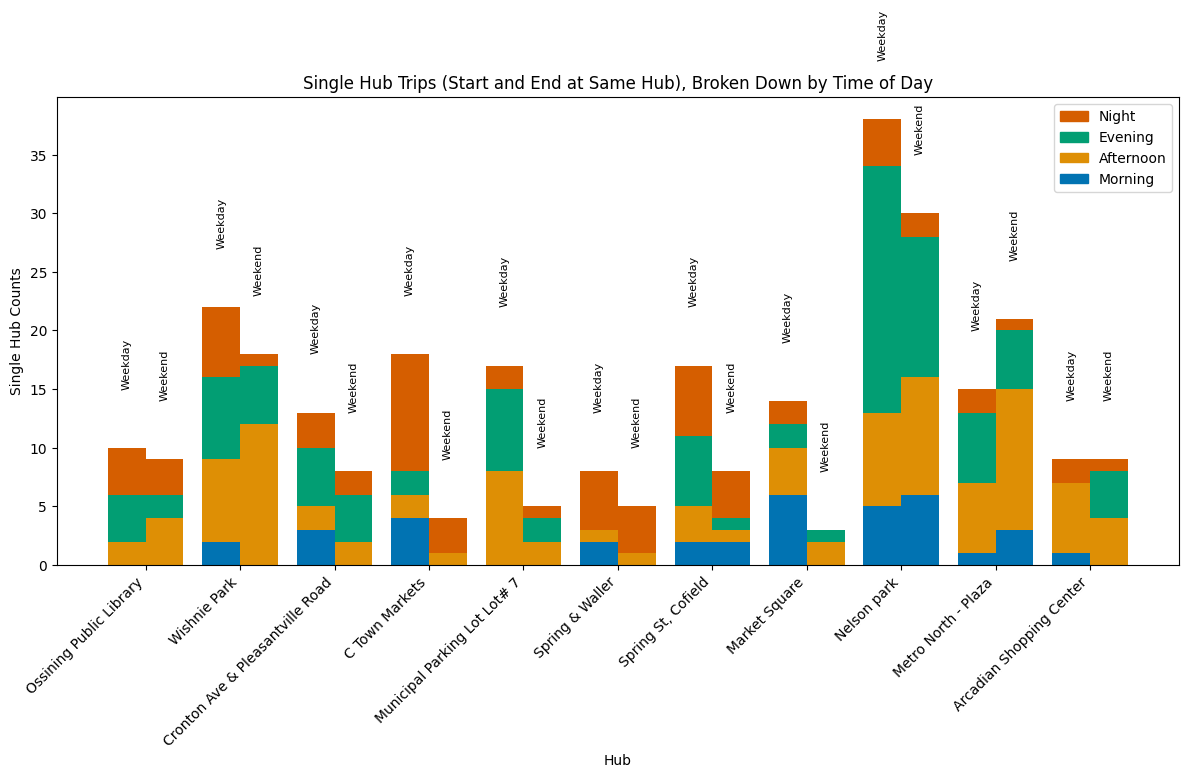

In [188]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Generate positions for the bars
x_positions = np.arange(len(hub_counts_df['Hub']))

# Plot stacked bars for weekday single hub counts by time of day
for i, time_of_day in enumerate(time_of_day_categories):
    if i == 0:
        plt.bar(x_positions - bar_width / 2, hub_counts_df[f'Weekday {time_of_day} Single Hub Count'], width=bar_width, 
                color=time_of_day_colors[time_of_day], label=f'Weekday {time_of_day}')
        bottom_weekday = hub_counts_df[f'Weekday {time_of_day} Single Hub Count']
    else:
        plt.bar(x_positions - bar_width / 2, hub_counts_df[f'Weekday {time_of_day} Single Hub Count'], width=bar_width, 
                bottom=bottom_weekday, color=time_of_day_colors[time_of_day])
        bottom_weekday += hub_counts_df[f'Weekday {time_of_day} Single Hub Count']

# Plot stacked bars for weekend single hub counts by time of day
for i, time_of_day in enumerate(time_of_day_categories):
    if i == 0:
        plt.bar(x_positions + bar_width / 2, hub_counts_df[f'Weekend {time_of_day} Single Hub Count'], width=bar_width, 
                color=time_of_day_colors[time_of_day], label=f'Weekend {time_of_day}')
        bottom_weekend = hub_counts_df[f'Weekend {time_of_day} Single Hub Count']
    else:
        plt.bar(x_positions + bar_width / 2, hub_counts_df[f'Weekend {time_of_day} Single Hub Count'], width=bar_width, 
                bottom=bottom_weekend, color=time_of_day_colors[time_of_day])
        bottom_weekend += hub_counts_df[f'Weekend {time_of_day} Single Hub Count']

# Add labels and title
plt.xlabel('Hub')
plt.ylabel('Single Hub Counts')
plt.title('Single Hub Trips (Start and End at Same Hub), Broken Down by Time of Day')
plt.xticks(x_positions, hub_counts_df['Hub'], rotation=45, ha='right')

# Add legend for time of day categories
handles = [plt.Rectangle((0, 0), 1, 1, color=time_of_day_colors[time_of_day], label=time_of_day) for time_of_day in time_of_day_categories[::-1]]
plt.legend(handles=handles)

# Add text annotations on top of each bar
for i, hub in enumerate(hub_counts_df['Hub']):
        # Weekday annotation
        plt.text(x_positions[i] - bar_width / 2, bottom_weekday.iloc[i] + 5, 'Weekday', 
                         ha='center', va='bottom', fontsize=8, rotation=90)
        # Weekend annotation
        plt.text(x_positions[i] + bar_width / 2, bottom_weekend.iloc[i] + 5, 'Weekend', 
                         ha='center', va='bottom', fontsize=8, rotation=90)

# Show the plot
plt.tight_layout()
plt.show()